c:\Users\vnori\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (75). n_quantiles is set to n_samples.
  warnings.warn(


           Transformer  Accuracy
0       StandardScaler  0.920000
1         MinMaxScaler  0.933333
2         MaxAbsScaler  0.960000
3         RobustScaler  0.880000
4           Normalizer  0.986667
5            Binarizer  0.600000
6  QuantileTransformer  0.840000
7     PowerTransformer  0.893333


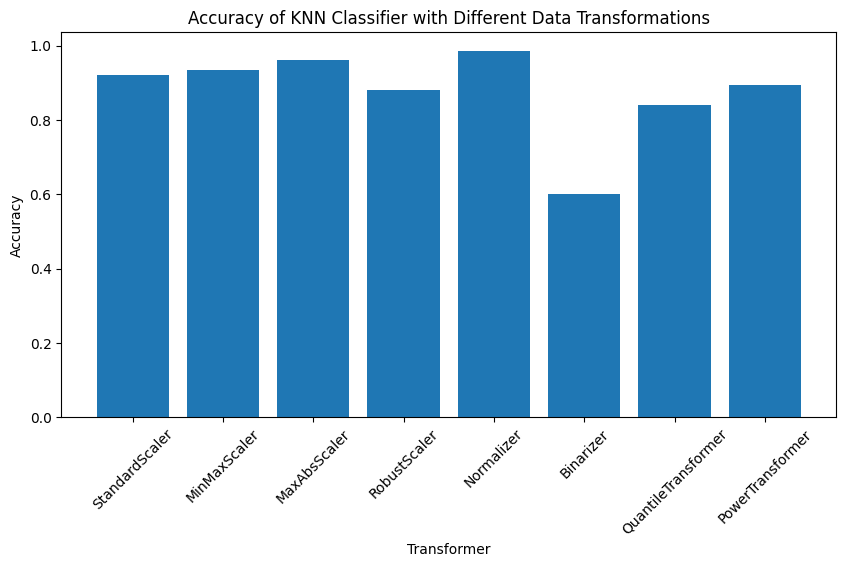

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    MaxAbsScaler, 
    RobustScaler, 
    Normalizer, 
    Binarizer, 
    QuantileTransformer, 
    PowerTransformer
)

# Загрузка данных
iris = load_iris()
target_names = iris.target_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=0
)

# Список методов преобразования данных
transformers = [
    StandardScaler(),
    MinMaxScaler(),
    MaxAbsScaler(),
    RobustScaler(),
    Normalizer(),
    Binarizer(threshold=0.6),
    QuantileTransformer(output_distribution='uniform'),
    PowerTransformer(method='yeo-johnson'),
]

# Создание таблицы для сравнения
results = []
for transformer in transformers:
    # Преобразование данных
    transformer.fit(X_train)
    X_train_transformed = transformer.transform(X_train)
    X_test_transformed = transformer.transform(X_test)
    
    # Обучение модели KNN
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train_transformed, y_train)
    
    # Предсказание на тестовой выборке
    y_pred = classifier.predict(X_test_transformed)
    
    # Расчет точности
    accuracy = accuracy_score(y_test, y_pred)
    
    # Добавление результата в таблицу
    results.append([transformer.__class__.__name__, accuracy])

# Создание таблицы для сравнения
results_df = pd.DataFrame(results, columns=['Transformer', 'Accuracy'])
print(results_df)

# Вывод графиков
plt.figure(figsize=(10, 5))
plt.bar(results_df['Transformer'], results_df['Accuracy'])
plt.xlabel('Transformer')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Classifier with Different Data Transformations')
plt.xticks(rotation=45)
plt.show()